In [1]:
import os
from classy import Class
import numpy as np
from powerbispectrum import ComputePowerBiSpectrum
from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
h_fid = .6736
omega_b_fid = .02237
omega_cdm_fid = .12
n_s_fid = .9649
A_s_fid = 2.083e-9

params_cosmo = {
            'output': 'mPk',
            'h': h_fid,
            'omega_b': omega_b_fid,
            'omega_cdm': omega_cdm_fid,
            'n_s': n_s_fid,
            'A_s': A_s_fid,
            'tau_reio': 0.0544,
            'N_ncdm': 1.,
            'm_ncdm': 0.06,
            'N_ur': 2.0328,
            'z_max_pk': 3.,
            'P_k_max_h/Mpc': 50.,
            }
z = .8

In [3]:
k = np.concatenate((np.linspace(.001, .01, 10),np.linspace(.02, 1, 99)))
len(k)

109

In [4]:
cl = ComputePowerBiSpectrum(params_cosmo, z, diag=False)
cl.initial_power_spectrum()

In [5]:
max_a_post = {'b1': 1.9943274e+00,
 'b2': -2.8493848e-01,
 'bG2': -2.9738286e-01,
 'c1': 0,
 'c2': 0,
 'ch': 3.9950281e+02,
 'Pshot': 5.6773871e-01,
 'Bshot': 2.9556961e+00,
             }

In [6]:
%%time
ell1 = 1
ell2 = 1
ELL = 2
cl.calc_B(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='tree',
        ks=.05,
    )
tree = cl.BK
cl.calc_B(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='SN',
        ks=.05,
    )
SN = cl.BK
BK = tree['K']+SN['K']

k1 =  0.001 h/Mpc
k1 =  0.002 h/Mpc
k1 =  0.003 h/Mpc
k1 =  0.004 h/Mpc
k1 =  0.005 h/Mpc
k1 =  0.006 h/Mpc
k1 =  0.007 h/Mpc
k1 =  0.008 h/Mpc
k1 =  0.009000000000000001 h/Mpc
k1 =  0.01 h/Mpc
k1 =  0.02 h/Mpc
k1 =  0.03 h/Mpc
k1 =  0.04 h/Mpc
k1 =  0.05 h/Mpc
k1 =  0.06 h/Mpc
k1 =  0.07 h/Mpc
k1 =  0.08 h/Mpc
k1 =  0.09000000000000001 h/Mpc
k1 =  0.1 h/Mpc
k1 =  0.11 h/Mpc
k1 =  0.12000000000000001 h/Mpc
k1 =  0.13 h/Mpc
k1 =  0.13999999999999999 h/Mpc
k1 =  0.15 h/Mpc
k1 =  0.16 h/Mpc
k1 =  0.16999999999999998 h/Mpc
k1 =  0.18 h/Mpc
k1 =  0.19 h/Mpc
k1 =  0.19999999999999998 h/Mpc
k1 =  0.21 h/Mpc
k1 =  0.22 h/Mpc
k1 =  0.22999999999999998 h/Mpc
k1 =  0.24 h/Mpc
k1 =  0.25 h/Mpc
k1 =  0.26 h/Mpc
k1 =  0.27 h/Mpc
k1 =  0.28 h/Mpc
k1 =  0.29000000000000004 h/Mpc
k1 =  0.30000000000000004 h/Mpc
k1 =  0.31 h/Mpc
k1 =  0.32 h/Mpc
k1 =  0.33 h/Mpc
k1 =  0.34 h/Mpc
k1 =  0.35000000000000003 h/Mpc
k1 =  0.36000000000000004 h/Mpc
k1 =  0.37000000000000005 h/Mpc
k1 =  0.38 h/Mpc
k1 =  0.39 h/

In [7]:
np.savetxt('/home/rneveux/to_mike/model_example/B_112.txt',BK)

(0.005, 0.3)

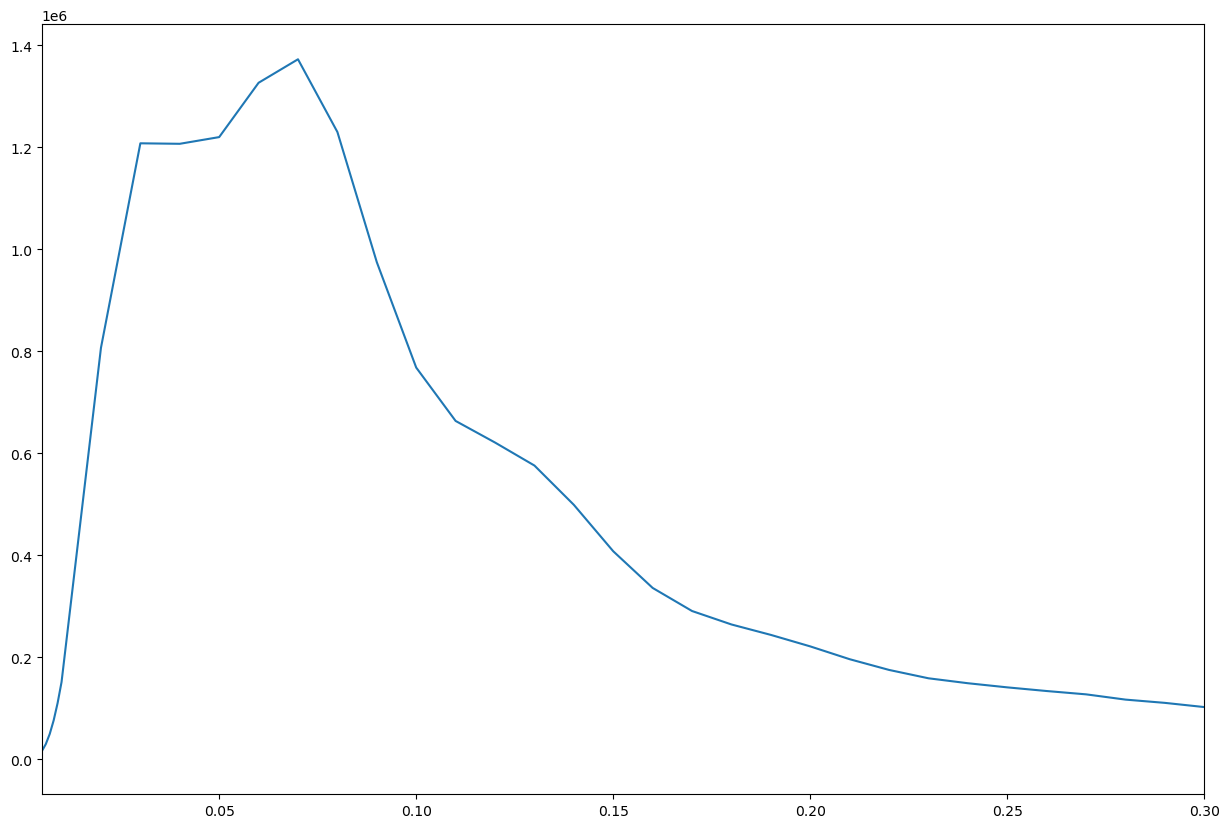

In [8]:
plt.plot(tree['kbin1'][:,0], tree['kbin1'][:,0]**2*np.diag(BK))
plt.xlim([.005,.3])

In [ ]:
%%time
ell1 = 0
ell2 = 0
ELL = 0
cl.calc_B_diag(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='tree',
        ks=.02,
    )
tree_1 = cl.BK
cl.calc_B_diag(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='SN',
        ks=.02,
    )
SN_1 = cl.BK

In [ ]:
%%time
ell1 = 0
ell2 = 0
ELL = 0
cl.calc_B_diag(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='tree',
        ks=.05, Sigma2 = 'zero'
    )
tree_0 = cl.BK
cl.calc_B_diag(
        k, ell1, ell2, ELL,
        alpha_perp=1, alpha_parallel=1, b1=max_a_post['b1'], b2=max_a_post['b2'], bG2=max_a_post['bG2'],
        c1=max_a_post['c1'], c2=max_a_post['c2'], knl=.3,
        Pshot=max_a_post['Pshot']*1000, Bshot=max_a_post['Bshot']*1000,
        integrand='SN',
        ks=.05, Sigma2 = 'zero'
    )
SN_0 = cl.BK

In [ ]:
BK = tree['K']+SN['K']
BK_0 = tree_0['K']+SN_0['K']
BK_1 = tree_1['K']+SN_1['K']

In [ ]:
plt.plot(tree['kbin'], tree['kbin']**2*BK)
plt.plot(tree['kbin'], tree['kbin']**2*BK_0)
plt.plot(tree['kbin'], tree['kbin']**2*BK_1)

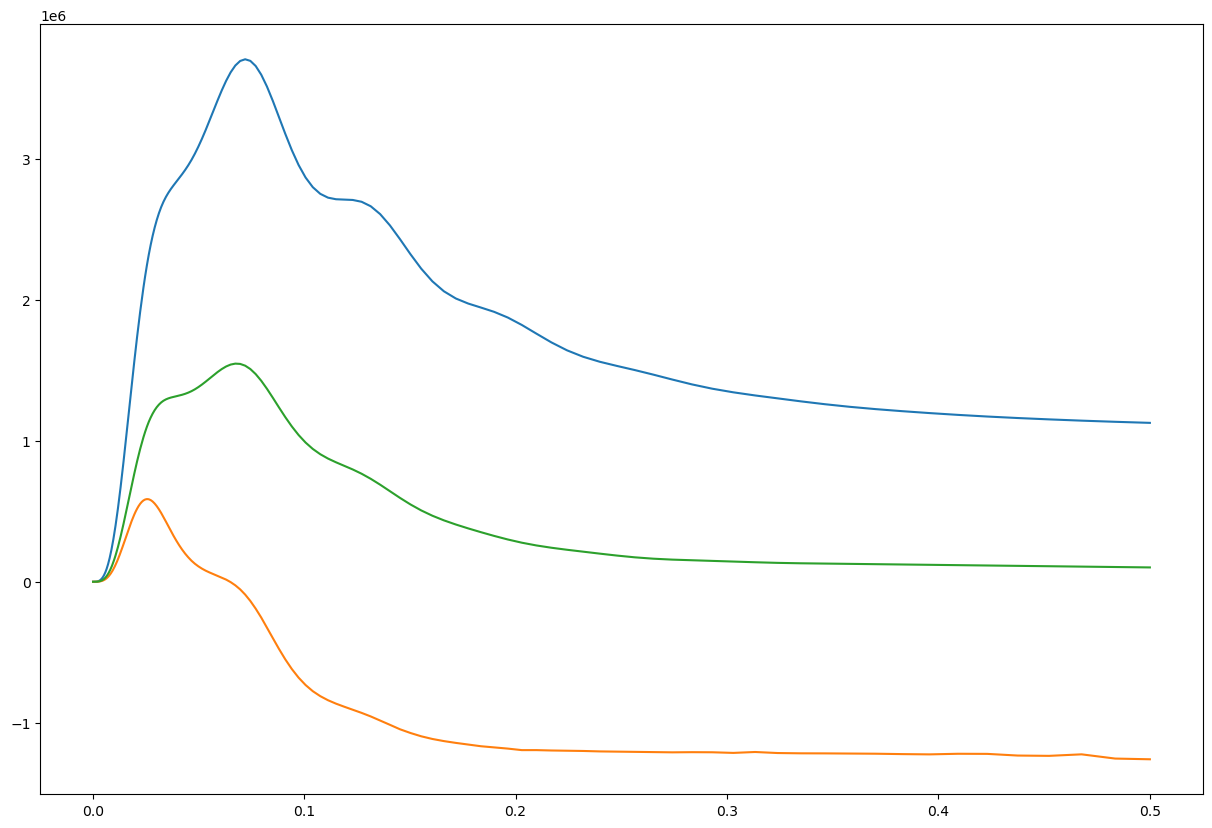

In [6]:
klog = np.logspace(-4, np.log10(0.5), num=256, base=10)
bk = {}
for ell in ['000','110','202']:
    bk[ell] = np.loadtxt(f'/home/rneveux/to_mike/model_example/klog/B_{ell}.txt')
    plt.plot(klog, klog**2*np.diag(bk[ell]))